In [ ]:
!pip install bayesian-optimization

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_val_score

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
pwd

'/content'

In [ ]:
train_df=pd.read_csv('/content/gdrive/My Drive/HackerEarth/Pet Adoption/train.csv')
test_df=pd.read_csv('/content/gdrive/My Drive/HackerEarth/Pet Adoption/test.csv')

In [ ]:
train_df.head()

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category
0,ANSL_69903,2016-07-10 00:00:00,2016-09-21 16:25:00,2.0,Brown Tabby,0.80,7.78,13,9,0.0,1
1,ANSL_66892,2013-11-21 00:00:00,2018-12-27 17:47:00,1.0,White,0.72,14.19,13,9,0.0,2
2,ANSL_69750,2014-09-28 00:00:00,2016-10-19 08:24:00,NaN,Brown,0.15,40.90,15,4,2.0,4
3,ANSL_71623,2016-12-31 00:00:00,2019-01-25 18:30:00,1.0,White,0.62,17.82,0,1,0.0,2
4,ANSL_57969,2017-09-28 00:00:00,2017-11-19 09:38:00,2.0,Black,0.50,11.06,18,4,0.0,1


In [ ]:
g=sns.scatterplot(x='X1',y='X2',data=train_df,palette=cmap, legend='full')
g

NameError: ignored

In [ ]:
test_df.head()

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2
0,ANSL_75005,2005-08-17 00:00:00,2017-09-07 15:35:00,0.0,Black,0.87,42.73,0,7
1,ANSL_76663,2018-11-15 00:00:00,2019-05-08 17:24:00,1.0,Orange Tabby,0.06,6.71,0,1
2,ANSL_58259,2012-10-11 00:00:00,2018-04-02 16:51:00,1.0,Black,0.24,41.21,0,7
3,ANSL_67171,2015-02-13 00:00:00,2018-04-06 07:25:00,1.0,Black,0.29,8.46,7,1
4,ANSL_72871,2017-01-18 00:00:00,2018-04-26 13:42:00,1.0,Brown,0.71,30.92,0,7


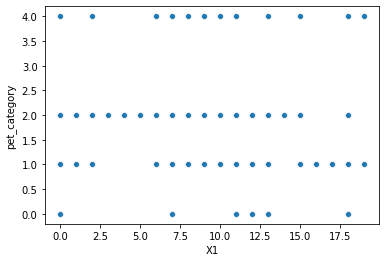

In [ ]:
sns.scatterplot(x=train_df['X1'],y=train_df['pet_category'])

In [ ]:
train_df['pet_category'].value_counts()

2    10621
1     7184
4      941
0       88
Name: pet_category, dtype: int64

In [ ]:
train_df['breed_category'].value_counts()

0.0    9000
1.0    8357
2.0    1477
Name: breed_category, dtype: int64

In [ ]:
train_df.isnull().sum()

pet_id               0
issue_date           0
listing_date         0
condition         1477
color_type           0
length(m)            0
height(cm)           0
X1                   0
X2                   0
breed_category       0
pet_category         0
dtype: int64

In [ ]:
test_df.isnull().sum()

pet_id            0
issue_date        0
listing_date      0
condition       619
color_type        0
length(m)         0
height(cm)        0
X1                0
X2                0
dtype: int64

In [ ]:
def knn_regressor_for_null_values(knn_df,index):
  #get name of target column from index
  targetname=knn_df.columns[index]
  #create a new dataframe with no NA values
  knn_new_df=knn_df.dropna(axis=0)
  #split into target and dependent variables X and y
  y=knn_new_df[targetname]
  knn_new_df.drop(knn_new_df.columns[[index]],axis=1,inplace=True)
  X=knn_new_df
  X=X.to_numpy()
  y=y.to_numpy()
  #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05, random_state = 0)
  from sklearn.neighbors import KNeighborsClassifier
  model = KNeighborsClassifier(n_neighbors=200)
  model.fit(X,y)
  #now create a subset dataframe with all null values of target variable
  bool_series = pd.isnull(knn_df[targetname])
  null_df=knn_df[bool_series]
  main_test=null_df.drop(null_df.columns[[index]],axis=1)
  main_test=main_test.to_numpy()
  #make predictions for target variable
  actual_pred=model.predict(main_test)
  actual_pred=pd.Series(actual_pred)
  actual_pred.columns=targetname
  actual_pred.index=null_df.index
  #replace null values in original knn_df with pred values
  knn_df[knn_df.columns[index]].fillna(actual_pred, inplace=True)
  return knn_df
  



  


In [ ]:
knn_train_df=train_df[['condition','breed_category','pet_category']]
knn_train_df.head()

,condition,breed_category,pet_category
0,2.0,0.0,1
1,1.0,0.0,2
2,NaN,2.0,4
3,1.0,0.0,2
4,2.0,0.0,1


In [ ]:
knn_train_df=knn_regressor_for_null_values(knn_train_df,0)
knn_train_df.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,condition,breed_category,pet_category
0,2.0,0.0,1
1,1.0,0.0,2
2,2.0,2.0,4
3,1.0,0.0,2
4,2.0,0.0,1


In [ ]:
train_df.drop(['condition','breed_category','pet_category'],axis=1,inplace=True)
train_df=pd.concat([train_df,knn_train_df],axis=1)

In [ ]:
knn_test_df=test_df[['condition','length(m)','height(cm)','X1','X2']]
knn_test_df.head()


,condition,length(m),height(cm),X1,X2
0,0.0,0.87,42.73,0,7
1,1.0,0.06,6.71,0,1
2,1.0,0.24,41.21,0,7
3,1.0,0.29,8.46,7,1
4,1.0,0.71,30.92,0,7


In [ ]:
knn_test_df=knn_regressor_for_null_values(knn_test_df,0)
knn_test_df.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,condition,length(m),height(cm),X1,X2
0,0.0,0.87,42.73,0,7
1,1.0,0.06,6.71,0,1
2,1.0,0.24,41.21,0,7
3,1.0,0.29,8.46,7,1
4,1.0,0.71,30.92,0,7


In [ ]:
test_df.drop(['condition','length(m)','height(cm)','X1','X2'],axis=1,inplace=True)
test_df=pd.concat([test_df,knn_test_df],axis=1)

In [ ]:
test_df.head()

,pet_id,issue_date,listing_date,color_type,condition,length(m),height(cm),X1,X2
0,ANSL_75005,2005-08-17 00:00:00,2017-09-07 15:35:00,Black,0.0,0.87,42.73,0,7
1,ANSL_76663,2018-11-15 00:00:00,2019-05-08 17:24:00,Orange Tabby,1.0,0.06,6.71,0,1
2,ANSL_58259,2012-10-11 00:00:00,2018-04-02 16:51:00,Black,1.0,0.24,41.21,0,7
3,ANSL_67171,2015-02-13 00:00:00,2018-04-06 07:25:00,Black,1.0,0.29,8.46,7,1
4,ANSL_72871,2017-01-18 00:00:00,2018-04-26 13:42:00,Brown,1.0,0.71,30.92,0,7


In [ ]:
test_df.isnull().sum()

pet_id          0
issue_date      0
listing_date    0
color_type      0
condition       0
length(m)       0
height(cm)      0
X1              0
X2              0
dtype: int64

In [ ]:
train_df.head()

,pet_id,issue_date,listing_date,color_type,length(m),height(cm),X1,X2,condition,breed_category,pet_category
0,ANSL_69903,2016-07-10 00:00:00,2016-09-21 16:25:00,Brown Tabby,0.80,7.78,13,9,2.0,0.0,1
1,ANSL_66892,2013-11-21 00:00:00,2018-12-27 17:47:00,White,0.72,14.19,13,9,1.0,0.0,2
2,ANSL_69750,2014-09-28 00:00:00,2016-10-19 08:24:00,Brown,0.15,40.90,15,4,2.0,2.0,4
3,ANSL_71623,2016-12-31 00:00:00,2019-01-25 18:30:00,White,0.62,17.82,0,1,1.0,0.0,2
4,ANSL_57969,2017-09-28 00:00:00,2017-11-19 09:38:00,Black,0.50,11.06,18,4,2.0,0.0,1


In [ ]:
train_df['length(m)']=train_df['length(m)']*100
train_df.rename(columns = {'length(m)':'length(cm)'}, inplace = True)
test_df['length(m)']=test_df['length(m)']*100
test_df.rename(columns = {'length(m)':'length(cm)'}, inplace = True)

In [ ]:
train_df.head()

,pet_id,issue_date,listing_date,color_type,length(cm),height(cm),X1,X2,condition,breed_category,pet_category
0,ANSL_69903,2016-07-10 00:00:00,2016-09-21 16:25:00,Brown Tabby,80.0,7.78,13,9,2.0,0.0,1
1,ANSL_66892,2013-11-21 00:00:00,2018-12-27 17:47:00,White,72.0,14.19,13,9,1.0,0.0,2
2,ANSL_69750,2014-09-28 00:00:00,2016-10-19 08:24:00,Brown,15.0,40.90,15,4,2.0,2.0,4
3,ANSL_71623,2016-12-31 00:00:00,2019-01-25 18:30:00,White,62.0,17.82,0,1,1.0,0.0,2
4,ANSL_57969,2017-09-28 00:00:00,2017-11-19 09:38:00,Black,50.0,11.06,18,4,2.0,0.0,1


In [ ]:
train_df['color_type'].unique()

array(['Brown Tabby', 'White', 'Brown', 'Black', 'Red', 'Tricolor',
       'Calico', 'Brown Brindle', 'Blue', 'Tortie', 'Gray', 'Fawn',
       'Buff', 'Torbie', 'Orange Tabby', 'Sable', 'Tan', 'Blue Tick',
       'Orange', 'Blue Tabby', 'Chocolate', 'Black Tabby',
       'Black Brindle', 'Cream Tabby', 'Gold', 'Calico Point',
       'Blue Merle', 'Red Merle', 'Yellow', 'Lynx Point', 'Blue Cream',
       'Flame Point', 'Cream', 'Yellow Brindle', 'Blue Tiger',
       'Seal Point', 'Red Tick', 'Brown Merle', 'Black Smoke',
       'Gray Tabby', 'Green', 'Tortie Point', 'Blue Smoke', 'Apricot',
       'Blue Point', 'Silver Tabby', 'Lilac Point', 'Silver',
       'Brown Tiger', 'Liver', 'Agouti', 'Chocolate Point', 'Liver Tick',
       'Pink', 'Black Tiger', 'Silver Lynx Point'], dtype=object)

In [ ]:
train_df['color_type'].groupby(train_df.breed_category).value_counts().sum()

18834

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
train_df['color_type'] = labelencoder.fit_transform(train_df['color_type'])
test_df['color_type'] = labelencoder.fit_transform(test_df['color_type'])

In [ ]:
train_df.head()

,pet_id,issue_date,listing_date,color_type,length(cm),height(cm),X1,X2,condition,breed_category,pet_category
0,ANSL_69903,2016-07-10 00:00:00,2016-09-21 16:25:00,18,80.0,7.78,13,9,2.0,0.0,1
1,ANSL_66892,2013-11-21 00:00:00,2018-12-27 17:47:00,53,72.0,14.19,13,9,1.0,0.0,2
2,ANSL_69750,2014-09-28 00:00:00,2016-10-19 08:24:00,15,15.0,40.90,15,4,2.0,2.0,4
3,ANSL_71623,2016-12-31 00:00:00,2019-01-25 18:30:00,53,62.0,17.82,0,1,1.0,0.0,2
4,ANSL_57969,2017-09-28 00:00:00,2017-11-19 09:38:00,2,50.0,11.06,18,4,2.0,0.0,1


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18834 entries, 0 to 18833
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   pet_id          18834 non-null  object 
 1   issue_date      18834 non-null  object 
 2   listing_date    18834 non-null  object 
 3   color_type      18834 non-null  int64  
 4   length(cm)      18834 non-null  float64
 5   height(cm)      18834 non-null  float64
 6   X1              18834 non-null  int64  
 7   X2              18834 non-null  int64  
 8   condition       18834 non-null  float64
 9   breed_category  18834 non-null  float64
 10  pet_category    18834 non-null  int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 1.6+ MB


In [ ]:
train_df['issue_date']=pd.to_datetime(train_df['issue_date'])
train_df['listing_date']=pd.to_datetime(train_df['listing_date'])
test_df['issue_date']=pd.to_datetime(test_df['issue_date'])
test_df['listing_date']=pd.to_datetime(test_df['listing_date'])


In [ ]:
train_df['days']=train_df['listing_date']-train_df['issue_date']
train_df['days']=abs(train_df['days'].apply(lambda x:x/np.timedelta64(1, 'D')))
test_df['days']=test_df['listing_date']-test_df['issue_date']
test_df['days']=abs(test_df['days'].apply(lambda x:x/np.timedelta64(1, 'D')))
train_df['days']=train_df['days'].astype(int)
test_df['days']=test_df['days'].astype(int)


In [ ]:
train_df.head()

,pet_id,issue_date,listing_date,color_type,length(cm),height(cm),X1,X2,condition,breed_category,pet_category,days
0,ANSL_69903,2016-07-10,2016-09-21 16:25:00,18,80.0,7.78,13,9,2.0,0.0,1,73
1,ANSL_66892,2013-11-21,2018-12-27 17:47:00,53,72.0,14.19,13,9,1.0,0.0,2,1862
2,ANSL_69750,2014-09-28,2016-10-19 08:24:00,15,15.0,40.90,15,4,2.0,2.0,4,752
3,ANSL_71623,2016-12-31,2019-01-25 18:30:00,53,62.0,17.82,0,1,1.0,0.0,2,755
4,ANSL_57969,2017-09-28,2017-11-19 09:38:00,2,50.0,11.06,18,4,2.0,0.0,1,52


In [ ]:
train_df.isnull().sum()

pet_id            0
issue_date        0
listing_date      0
color_type        0
length(cm)        0
height(cm)        0
X1                0
X2                0
condition         0
breed_category    0
pet_category      0
days              0
dtype: int64

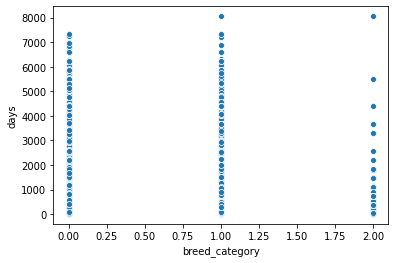

In [ ]:
import seaborn as sns
sns.scatterplot(x=train_df['breed_category'],y=train_df['days'])

In [ ]:
train_df['days'].groupby(train_df['breed_category']).mean()

breed_category
0.0    922.408222
1.0    870.787005
2.0    358.945836
Name: days, dtype: float64

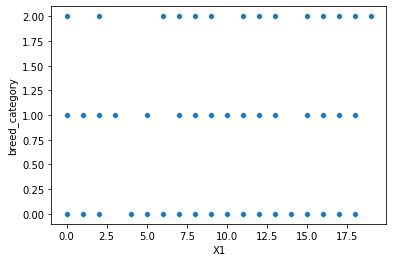

In [ ]:
sns.scatterplot(x=train_df['X1'],y=train_df['breed_category'])

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18834 entries, 0 to 18833
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   pet_id          18834 non-null  object        
 1   issue_date      18834 non-null  datetime64[ns]
 2   listing_date    18834 non-null  datetime64[ns]
 3   color_type      18834 non-null  int64         
 4   length(cm)      18834 non-null  float64       
 5   height(cm)      18834 non-null  float64       
 6   X1              18834 non-null  int64         
 7   X2              18834 non-null  int64         
 8   condition       18834 non-null  float64       
 9   breed_category  18834 non-null  float64       
 10  pet_category    18834 non-null  int64         
 11  days            18834 non-null  int64         
dtypes: datetime64[ns](2), float64(4), int64(5), object(1)
memory usage: 1.7+ MB


In [ ]:
test_df.head()

,pet_id,issue_date,listing_date,color_type,condition,length(cm),height(cm),X1,X2,days
0,ANSL_75005,2005-08-17,2017-09-07 15:35:00,2,0.0,87.0,42.73,0,7,4404
1,ANSL_76663,2018-11-15,2019-05-08 17:24:00,36,1.0,6.0,6.71,0,1,174
2,ANSL_58259,2012-10-11,2018-04-02 16:51:00,2,1.0,24.0,41.21,0,7,1999
3,ANSL_67171,2015-02-13,2018-04-06 07:25:00,2,1.0,29.0,8.46,7,1,1148
4,ANSL_72871,2017-01-18,2018-04-26 13:42:00,14,1.0,71.0,30.92,0,7,463


In [ ]:

train_df.drop(['pet_id','issue_date','listing_date','pet_category'],axis=1,inplace=True)
test_pet_id=test_df['pet_id']
test_df.drop(['pet_id','issue_date','listing_date'],axis=1,inplace=True)

In [ ]:
train_df.head()

,color_type,length(cm),height(cm),X1,X2,condition,breed_category,days
0,18,80.0,7.78,13,9,2.0,0.0,73
1,53,72.0,14.19,13,9,1.0,0.0,1862
2,15,15.0,40.90,15,4,2.0,2.0,752
3,53,62.0,17.82,0,1,1.0,0.0,755
4,2,50.0,11.06,18,4,2.0,0.0,52


In [ ]:
test_df.head()

,color_type,condition,length(cm),height(cm),X1,X2,days
0,2,0.0,87.0,42.73,0,7,4404
1,36,1.0,6.0,6.71,0,1,174
2,2,1.0,24.0,41.21,0,7,1999
3,2,1.0,29.0,8.46,7,1,1148
4,14,1.0,71.0,30.92,0,7,463


In [ ]:
pip install xgboost

In [ ]:
pip install catboost

     |████████████████████████████████| 65.9MB 70kB/s 


In [ ]:
#from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier

from sklearn.metrics import *

In [ ]:
X=train_df[['color_type','condition','length(cm)','height(cm)','X1','X2','days']]
y=train_df[['breed_category']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.01, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)


In [ ]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train) 
print(X_train_res.shape,y_train_res.shape)

(26727, 7) (26727,)


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)

In [ ]:
clf1 = LogisticRegression(random_state=0)
clf2=GradientBoostingClassifier(random_state=0)
clf4=CatBoostClassifier(random_state=0)
    

In [ ]:
from sklearn.ensemble import  VotingClassifier
model_breed = VotingClassifier(estimators=[('clf1', clf1), ('clf2', clf2),('clf4',clf4)], voting='hard')


In [ ]:
model_pet = VotingClassifier(estimators=[('clf1', clf1), ('clf2', clf2),('clf4',clf4)], voting='soft')

In [ ]:
model_breed.fit(X_train_res, y_train_res.ravel())

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Learning rate set to 0.093562
0:	learn: 0.9705738	total: 68.9ms	remaining: 1m 8s
1:	learn: 0.8697566	total: 89.9ms	remaining: 44.9s
2:	learn: 0.7880186	total: 110ms	remaining: 36.6s
3:	learn: 0.7225264	total: 130ms	remaining: 32.4s
4:	learn: 0.6669253	total: 150ms	remaining: 29.8s
5:	learn: 0.6192747	total: 170ms	remaining: 28.2s
6:	learn: 0.5784761	total: 190ms	remaining: 27s
7:	learn: 0.5444240	total: 216ms	remaining: 26.7s
8:	learn: 0.5142124	total: 243ms	remaining: 26.8s
9:	learn: 0.4859221	total: 263ms	remaining: 26s
10:	learn: 0.4597329	total: 283ms	remaining: 25.4s
11:	learn: 0.4378768	total: 302ms	remaining: 24.9s
12:	learn: 0.4175378	total: 324ms	remaining: 24.6s
13:	learn: 0.3994734	total: 345ms	remaining: 24.3s
14:	learn: 0.3837279	total: 365ms	remaining: 23.9s
15:	learn: 0.3678540	total: 385ms	remaining: 23.7s
16:	learn: 0.3565933	total: 405ms	remaining: 23.4s
17:	learn: 0.3452180	total: 427ms	remaining: 23.3s
18:	learn: 0.3344421	total: 446ms	remaining: 23s
19:	learn: 0.32

In [ ]:
model_pet.fit(X_train_res, y_train_res)

Learning rate set to 0.095749
0:	learn: 1.2616694	total: 33.6ms	remaining: 33.5s
1:	learn: 1.1625283	total: 64.6ms	remaining: 32.2s
2:	learn: 1.0893771	total: 105ms	remaining: 34.8s
3:	learn: 1.0283216	total: 136ms	remaining: 33.9s
4:	learn: 0.9793928	total: 168ms	remaining: 33.4s
5:	learn: 0.9361892	total: 204ms	remaining: 33.8s
6:	learn: 0.8977837	total: 236ms	remaining: 33.5s
7:	learn: 0.8655975	total: 267ms	remaining: 33.1s
8:	learn: 0.8366895	total: 299ms	remaining: 33s
9:	learn: 0.8101188	total: 331ms	remaining: 32.7s
10:	learn: 0.7872022	total: 363ms	remaining: 32.6s
11:	learn: 0.7620067	total: 395ms	remaining: 32.6s
12:	learn: 0.7400359	total: 433ms	remaining: 32.8s
13:	learn: 0.7200911	total: 464ms	remaining: 32.7s
14:	learn: 0.7036566	total: 495ms	remaining: 32.5s
15:	learn: 0.6909097	total: 524ms	remaining: 32.3s
16:	learn: 0.6749985	total: 556ms	remaining: 32.2s
17:	learn: 0.6622213	total: 588ms	remaining: 32.1s
18:	learn: 0.6506274	total: 618ms	remaining: 31.9s
19:	learn: 

VotingClassifier(estimators=[('clf1',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=0, solver='lbfgs',
                                                 tol=0.0001, verbose=0,
                                                 warm_start=False)),
                             ('clf2',
                              GradientBoostingClassifier(ccp_alpha=0.0,
                                                         criterion='friedman_mse',
                                                         init=...
                                

In [ ]:
main_test=test_df.to_numpy()
print(main_test.shape)
final_pred_breed=model_breed.predict(test_df)


(8072, 7)


ValueError: ignored

In [ ]:

final_pred_pet=model_pet.predict(main_test)

In [ ]:
final_pred_pet_df=pd.DataFrame(final_pred_pet,columns=['pet_category'])

In [ ]:
final_pred_breed_df=pd.DataFrame(final_pred_breed,columns=['breed_category'])

In [ ]:
final_pred_breed_df['breed_category'].value_counts()

0.0    7532
1.0     540
Name: breed_category, dtype: int64

In [ ]:
submission_df=pd.DataFrame(test_pet_id,columns=['pet_id'])

In [ ]:
submission_df.head()

,pet_id
0,ANSL_75005
1,ANSL_76663
2,ANSL_58259
3,ANSL_67171
4,ANSL_72871


In [ ]:
submission_df=pd.concat([submission_df,final_pred_breed_df],axis=1)

In [ ]:
submission_df.head()

,pet_id,breed_category
0,ANSL_75005,0.0
1,ANSL_76663,0.0
2,ANSL_58259,0.0
3,ANSL_67171,0.0
4,ANSL_72871,0.0


In [ ]:
submission_df=pd.concat([submission_df,final_pred_pet_df],axis=1)

In [ ]:
submission_df.head()

,pet_id,breed_category,pet_category
0,ANSL_75005,0.0,2
1,ANSL_76663,0.0,2
2,ANSL_58259,0.0,2
3,ANSL_67171,0.0,2
4,ANSL_72871,0.0,2


In [ ]:
submission_df.to_csv('finalsub7.csv',index=False)